<a href="https://colab.research.google.com/github/Kaiaysez/Estimating-potting-probability-in-billiards/blob/main/Pool_Image_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os # Iterate through directories and join paths
import cv2 # For doing image operations
import tensorflow as tf
from tensorflow import keras
import pickle
import random


"""Specifying data directory, formating images and visualizing images."""

DATADIR =  "/content/drive/MyDrive"
CATEGORIES = ["Missed","Potted"]

IMG_SIZE = 224 # Constant for resizing image

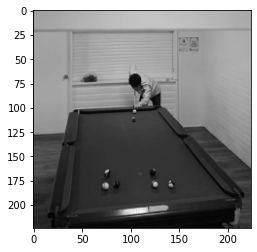

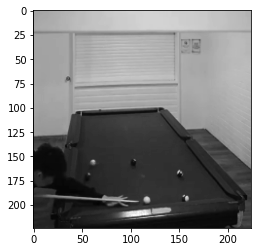

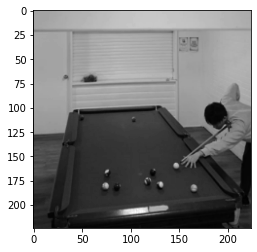

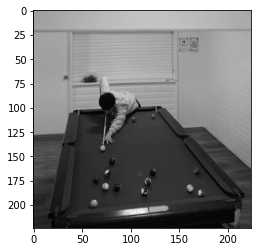

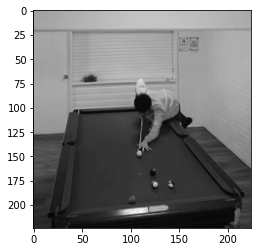

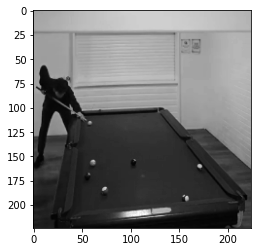

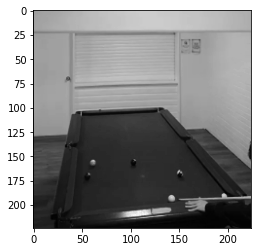

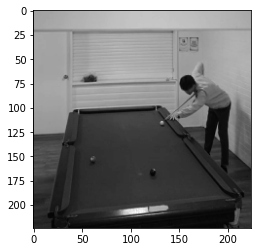

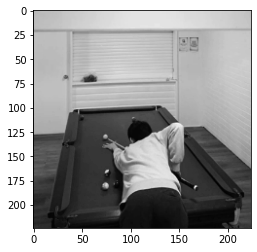

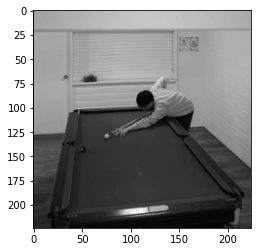

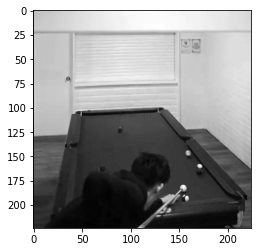

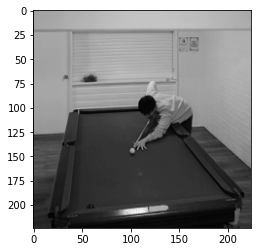

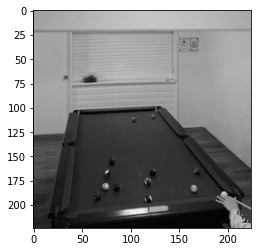

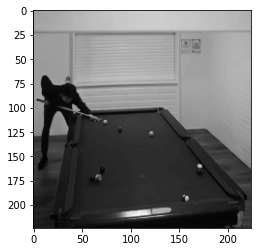

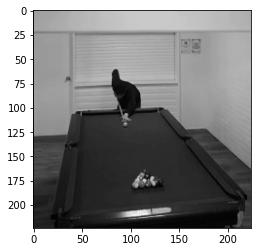

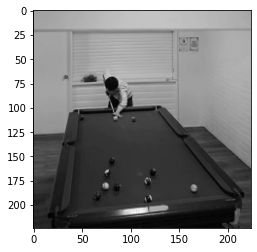

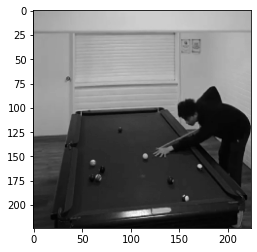

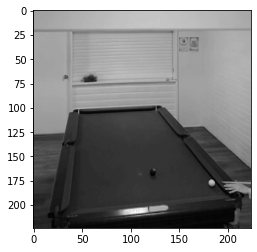

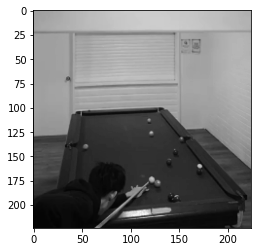

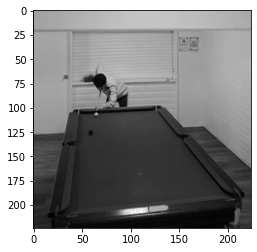

In [2]:
count = 20 # Number of pictures to display for exploratory visualization purposes
for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # Path to Miss and Success folder location
    for img in os.listdir(path): # For each image in the Miss/Success folder
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) # cv2 function to read images as arrays
        img_array = img_array[415:784,370:762] # Cropping the image
        img_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE)) # Resizes the image. If IMG_SIZE is a small number,
                                                                # the images will be extremely blurry. I am guessing 
                                                                # that the resizing is done via some sort of filter.
        plt.imshow(img_array, cmap = "gray") # Show the image represented by img_array
        plt.show()
        count = count - 1
        if count == 0:
            break
    break

In [3]:
training_data = [] # List containing [image,class] lists where image is a matrix, and class is 0 or 1
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # Path to Miss and Success folder location
        class_no = CATEGORIES.index(category) # The index of category in the list CATEGORIES
        for img in os.listdir(path): # For each image in the Miss/Success folder
            img_array = cv2.imread(os.path.join(path,img))
            #img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) # cv2 function to read images as arrays
            img_array = img_array[415:784,370:762] # Cropping the image
            new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE)) # Resizes the image. If IMG_SIZE is a small number,
                                                                    # the images will be extremely blurry. I am guessing 
                                                                    # that the resizing is done via some sort of filter.
            training_data.append([new_array, class_no]) # Append training_data with a list containing the image, and the
                                                        # class it belongs to
            
create_training_data()
    

random.shuffle(training_data)

X = [] # features (every pixel is a feature, so we have 150x150 = 22500 features)
y = [] # labels
for images,labels in training_data:
    X.append(images)
    y.append(labels)
    
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,3)
X = X/255
y = np.array(y)
# y = tf.one_hot(y, depth=2)

In [ ]:
y.shape
#X.shape

(157,)

In [45]:

"""
model = keras.Sequential([
   keras.layers.AveragePooling2D(pool_size=6, strides=3, input_shape=(IMG_SIZE,IMG_SIZE,1)),
   keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
   keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
   keras.layers.MaxPool2D(pool_size=2, strides=2),
   keras.layers.Dropout(0.5),
   keras.layers.Flatten(),
   keras.layers.Dense(units=128, activation='relu'),
   keras.layers.Dense(units=2, activation='softmax')
])

"""
"""
model = keras.Sequential([
   keras.layers.Conv2D(20, 3, input_shape=(IMG_SIZE,IMG_SIZE,1), activation='relu'),   
   #keras.layers.BatchNormaliza0tion(),
   keras.layers.MaxPool2D(3,1), # (Size,Stride)
   keras.layers.Dropout(0.3),

   keras.layers.Conv2D(40, 3, activation='relu'), # (No. of filters, kernel size)
   #keras.layers.BatchNormalization(),
   keras.layers.MaxPool2D(3,1),
   keras.layers.Dropout(0.3),

   keras.layers.Conv2D(80, 7, activation='relu'),
   #keras.layers.BatchNormalization(),
   keras.layers.MaxPool2D(3,1),   
   keras.layers.Dropout(0.3),

   keras.layers.Flatten(),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dropout(0.5),
   keras.layers.Dense(2, activation='softmax')
])

"""

""" VGG PERFORMS TERRIBLY
model = keras.Sequential([
   keras.layers.Conv2D(filters=50, kernel_size=3, input_shape=(IMG_SIZE,IMG_SIZE,1), activation='relu'), 
   keras.layers.Conv2D(filters=50, kernel_size=3, activation='relu'),
   keras.layers.MaxPool2D(pool_size=2,strides=2), 

   keras.layers.Conv2D(filters=100, kernel_size=3, activation='relu'), 
   keras.layers.Conv2D(filters=100, kernel_size=3, activation='relu'),
   keras.layers.MaxPool2D(pool_size=2,strides=2), 

   keras.layers.Conv2D(filters=150, kernel_size=3, activation='relu'), 
   keras.layers.Conv2D(filters=150, kernel_size=3, activation='relu'),
   keras.layers.MaxPool2D(pool_size=2,strides=2), 
 
   
   keras.layers.Dropout(0.5),
   keras.layers.Flatten(),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dense(64, activation='relu'),   
   keras.layers.Dense(2, activation='softmax')
])

"""

""" Alexnet is so-so, haven't tried tweaking it much
model = keras.Sequential([
   keras.layers.Conv2D(filters=64, kernel_size=11, strides=4, input_shape=(IMG_SIZE,IMG_SIZE,3), activation='relu'),    
   keras.layers.MaxPool2D(pool_size=3,strides=2),

   keras.layers.Conv2D(filters=128, kernel_size=5, padding='same', activation='relu'), 
   keras.layers.MaxPool2D(pool_size=3,strides=2),

   keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'), 
   keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'), 
   keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'), 
   keras.layers.MaxPool2D(pool_size=3,strides=2), 

   keras.layers.Flatten(),
   keras.layers.Dense(1024, activation='relu'),
   keras.layers.Dropout(0.3),
   keras.layers.Dense(512, activation='relu'),  
   keras.layers.Dense(2, activation='softmax')
])
"""




model.compile(optimizer = "adam",
              #loss = keras.losses.BinaryCrossentropy(),  
              loss = keras.losses.SparseCategoricalCrossentropy(),           
              metrics = ["accuracy"])

model.fit(X,y, epochs = 2000, batch_size = 180)



Epoch 1/2000
2/2 [==============================] - 1s 180ms/step - loss: 1.4909 - accuracy: 0.5339
Epoch 2/2000
2/2 [==============================] - 0s 174ms/step - loss: 0.6929 - accuracy: 0.5398
Epoch 3/2000
2/2 [==============================] - 0s 162ms/step - loss: 0.6884 - accuracy: 0.5693
Epoch 4/2000
2/2 [==============================] - 0s 165ms/step - loss: 0.7437 - accuracy: 0.5693
Epoch 5/2000
2/2 [==============================] - 0s 165ms/step - loss: 0.6925 - accuracy: 0.4690
Epoch 6/2000
2/2 [==============================] - 0s 171ms/step - loss: 0.6960 - accuracy: 0.4307
Epoch 7/2000
2/2 [==============================] - 0s 161ms/step - loss: 0.6943 - accuracy: 0.4307
Epoch 8/2000
2/2 [==============================] - 0s 165ms/step - loss: 0.6936 - accuracy: 0.4307
Epoch 9/2000
2/2 [==============================] - 0s 161ms/step - loss: 0.6928 - accuracy: 0.5546
Epoch 10/2000
2/2 [==============================] - 0s 161ms/step - loss: 0.6922 - accuracy: 0.5693

KeyboardInterrupt: ignored

In [46]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 54, 54, 64)        23296     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 26, 26, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 26, 26, 128)       204928    
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 12, 12, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 12, 12, 256)       295168    
                                                                 
 conv2d_48 (Conv2D)          (None, 12, 12, 256)      

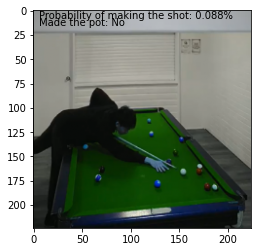

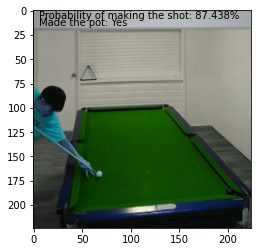

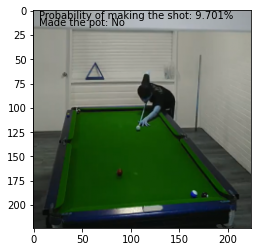

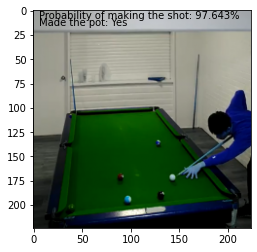

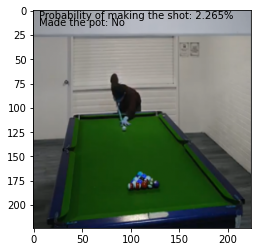

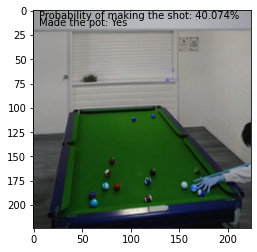

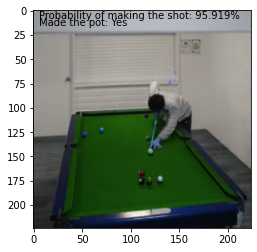

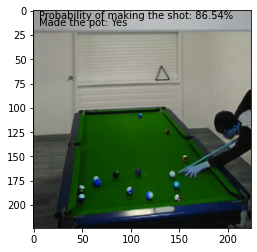

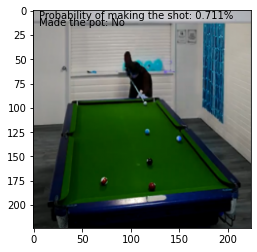

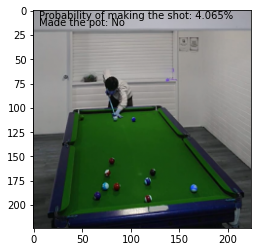

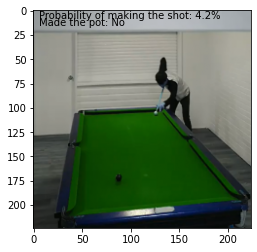

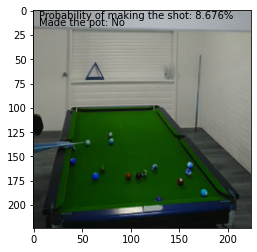

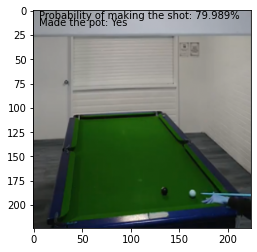

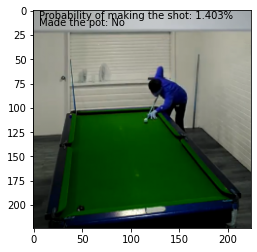

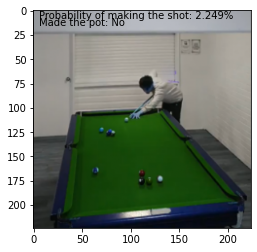

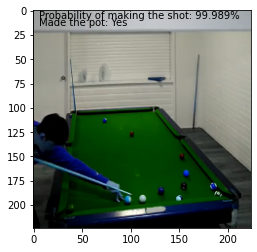

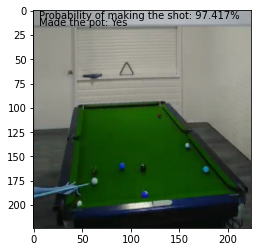

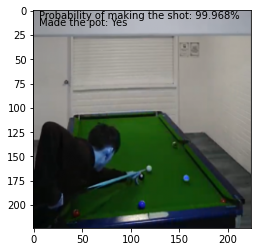

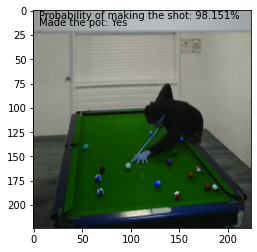

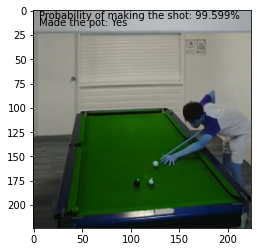

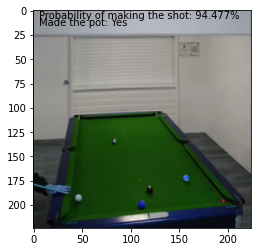

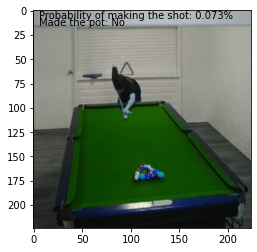

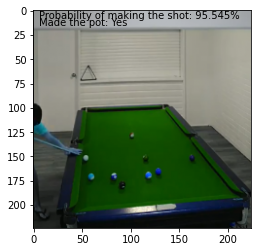

KeyboardInterrupt: ignored

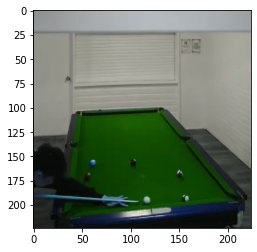

In [47]:

def predict(img_array,label = 2):
    #plt.imshow(img_array.reshape(IMG_SIZE,IMG_SIZE), cmap = "gray")
    plt.imshow(img_array.reshape(IMG_SIZE,IMG_SIZE,3))
    plt.annotate("Probability of making the shot: " +
                 #str(np.round(model.predict(img_array.reshape(1,IMG_SIZE,IMG_SIZE,1))[0][1]*100,3)) +
                 str(np.round(model.predict(img_array.reshape(1,IMG_SIZE,IMG_SIZE,3))[0][1]*100,3)) +
                 "%", (5,8))
    if label == 0:
        plt.annotate("Made the pot: No", (5,15))
    if label == 1:
        plt.annotate("Made the pot: Yes", (5,15))
    plt.show()
  
for i in range(len(X)):
  predict(X[i],y[i])

In [48]:
print(np.round(model.predict(X),3))

[[0.999 0.001]
 [0.126 0.874]
 [0.903 0.097]
 [0.024 0.976]
 [0.977 0.023]
 [0.599 0.401]
 [0.041 0.959]
 [0.135 0.865]
 [0.993 0.007]
 [0.959 0.041]
 [0.958 0.042]
 [0.913 0.087]
 [0.2   0.8  ]
 [0.986 0.014]
 [0.978 0.022]
 [0.    1.   ]
 [0.026 0.974]
 [0.    1.   ]
 [0.018 0.982]
 [0.004 0.996]
 [0.055 0.945]
 [0.999 0.001]
 [0.045 0.955]
 [0.967 0.033]
 [0.014 0.986]
 [0.006 0.994]
 [0.751 0.249]
 [0.05  0.95 ]
 [0.98  0.02 ]
 [0.674 0.326]
 [0.824 0.176]
 [0.231 0.769]
 [0.396 0.604]
 [0.051 0.949]
 [0.023 0.977]
 [0.008 0.992]
 [0.874 0.126]
 [0.    1.   ]
 [0.699 0.301]
 [0.975 0.025]
 [0.624 0.376]
 [0.981 0.019]
 [0.044 0.956]
 [0.069 0.931]
 [0.759 0.241]
 [0.47  0.53 ]
 [0.64  0.36 ]
 [0.966 0.034]
 [0.987 0.013]
 [0.381 0.619]
 [0.    1.   ]
 [0.574 0.426]
 [0.942 0.058]
 [0.06  0.94 ]
 [0.001 0.999]
 [0.97  0.03 ]
 [0.003 0.997]
 [0.176 0.824]
 [0.498 0.502]
 [0.006 0.994]
 [0.797 0.203]
 [1.    0.   ]
 [0.003 0.997]
 [0.943 0.057]
 [0.996 0.004]
 [0.01  0.99 ]
 [0.028 0.

In [49]:
def format_images(image_path):
    formatted_images = []
    for img in os.listdir(image_path):
        #img_array = cv2.imread(os.path.join(image_path,img), cv2.IMREAD_GRAYSCALE) 
        img_array = cv2.imread(os.path.join(image_path,img))
        # cv2 function to read images as arrays
        img_array = img_array[415:784,370:762] # Cropping the image
        img_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE)) # Resizing the image
        img_array = img_array/255 # Divide all pixel values by 255
        formatted_images.append(img_array)
    return formatted_images

test_images_f = format_images("/content/drive/MyDrive/f.files")
#for i in range(len(test_images_f)):   
#  predict(test_images_f[i])

In [50]:
test_images_s = format_images("/content/drive/MyDrive/s.files")
#for i in range(len(test_images_s)):   
#  predict(test_images_s[i])

In [51]:
print("For unsuccessful shots:")
val_accuracy_f = model.evaluate(np.array(test_images_f), np.zeros(len(test_images_f)))

print("For successful shots:")
val_accuracy_s = model.evaluate(np.array(test_images_s), np.ones(len(test_images_s)))

For unsuccessful shots:
1/1 [==============================] - 0s 217ms/step - loss: 3.7531 - accuracy: 0.4375
For successful shots:
1/1 [==============================] - 0s 48ms/step - loss: 1.4935 - accuracy: 0.6071
